C:\Users\janse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[3.19 1.91]
 [7.2  7.71]
 [2.89 6.4 ]]


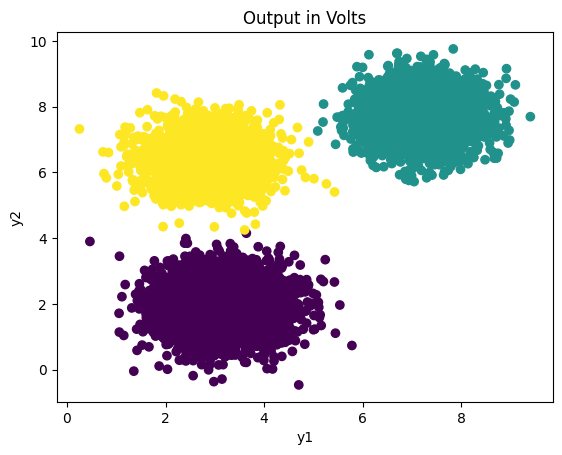

In [10]:
import pandas
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pandas.read_csv('volts.csv')

X1 = np.array(df['x1'][:])
X2 = np.array(df['x2'][:])
y1 = np.array(df['y1'][:])
y2 = np.array(df['y2'][:])

Y = np.column_stack((y1,y2))
X = np.column_stack((X1,X2))

km = KMeans(n_clusters=3)

data = km.fit_predict(Y)
plt.title('Output in Volts')
plt.ylabel('y2')
plt.xlabel('y1')
plt.scatter(Y[:,0],Y[:,1],c=data)

Z = km.cluster_centers_
Z = np.round(Z,2)
np.savetxt('Task_A.txt',Z, fmt = '%.2f')
print(Z)


(0.0, 10.0)

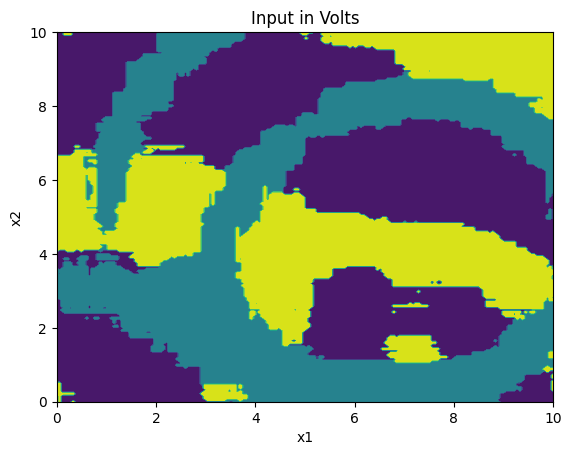

In [11]:
## doing the classification using random forest
from sklearn.ensemble import RandomForestClassifier

def gen_sample_grid(npx=200, npy=200, limit = 4):
  x1line = np.linspace(-limit/10, limit, npx)
  x2line = np.linspace(-limit/10, limit, npy)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
  return Xgrid, x1line, x2line

Xgrid, x1line, x2line = gen_sample_grid(limit=10)

# number estimators is the the number of trees being used
# depth is 20
clf = RandomForestClassifier(n_estimators=100,max_depth=10)

### for this Y is are X and data is are y
clf.fit(X,data)
Xgrid = clf.predict(Xgrid)

Xgrid = np.reshape(Xgrid,[200,200])

plt.contourf(x1line,x2line,Xgrid,cmap='viridis')
plt.title('Input in Volts')
plt.ylabel('x2')
plt.xlabel('x1')
plt.xlim(0,10)
plt.ylim(0,10)
# plt.scatter(X[data==0,0],X[data==0,1],c='red')
# plt.scatter(X[data==1,0],X[data==1,1],c='green')
# plt.scatter(X[data==2,0],X[data==2,1],c='blue')


(0.0, 10.0)

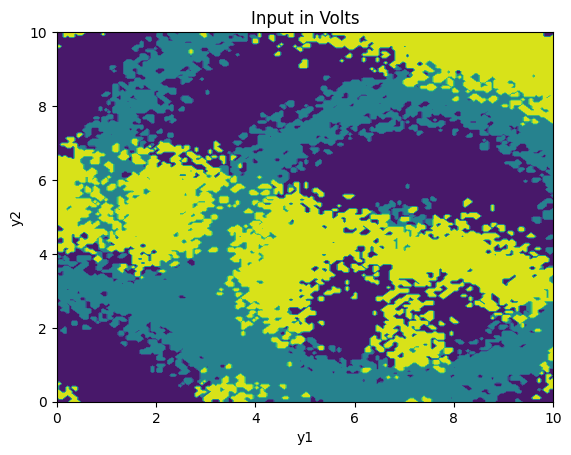

In [12]:
### doing the same classfication but with nearest neigbour approach
from sklearn.neighbors import KNeighborsClassifier

Xgrid, x1line, x2line = gen_sample_grid(200,200,10)

near = 1
neigh = KNeighborsClassifier(n_neighbors=near)
### for this Y is are X and data is are y
neigh.fit(X,data)
Xgrid = neigh.predict(Xgrid)
Xgrid = np.reshape(Xgrid,[200,200])

plt.contourf(x1line,x2line,Xgrid,cmap='viridis')
plt.title('Input in Volts')
plt.ylabel('y2')
plt.xlabel('y1')
plt.xlim(0,10)
plt.ylim(0,10)
# plt.scatter(X[data==0,0],X[data==0,1],c='red')
# plt.scatter(X[data==1,0],X[data==1,1],c='green')
# plt.scatter(X[data==2,0],X[data==2,1],c='blue')


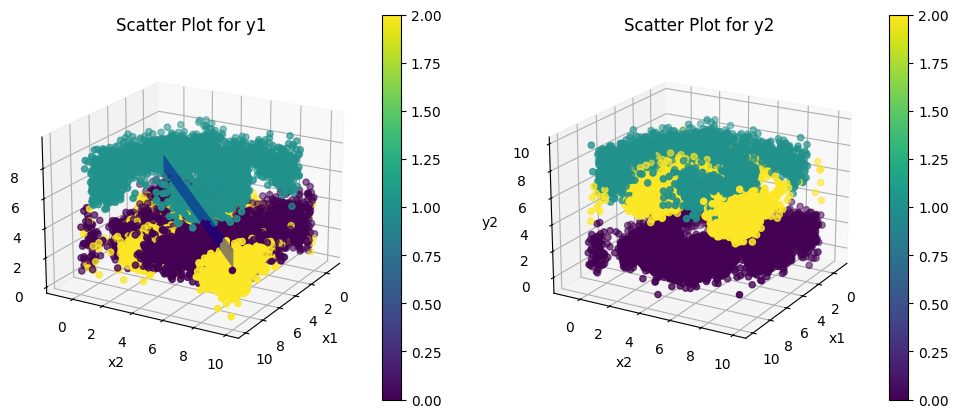

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

Xgrid, x1line, x2line = gen_sample_grid(200, 200, 10)

# Creating a polynomial regression model for y1
model_y1 = make_pipeline(PolynomialFeatures(degree=1), LinearRegression())
X_y1 = np.column_stack((X1, X2))
model_y1.fit(X_y1, y1)
y1_func = model_y1.predict(Xgrid)

# Creating a polynomial regression model for y2
model_y2 = make_pipeline(PolynomialFeatures(degree=1), LinearRegression())
X_y2 = np.column_stack((X1, X2))
model_y2.fit(X_y2, y2)
y2_func = model_y2.predict(Xgrid)

# Plotting the results
fig = plt.figure(figsize=(12, 5))

# Plot for y1
ax1 = fig.add_subplot(121, projection='3d')
scatter_y1 = ax1.scatter(X1, X2, y1, c=data, cmap='viridis', marker='o', label='Actual data')
ax1.plot_surface(x1line, x2line, y1_func.reshape(200, 200), color='b', alpha=0.5, label='Predicted surface')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y1')
ax1.set_title('Scatter Plot for y1')
fig.colorbar(scatter_y1, ax=ax1)

# Plot for y2
ax2 = fig.add_subplot(122, projection='3d')
scatter_y2 = ax2.scatter(X1, X2, y2, c=data, cmap='viridis', marker='o', label='Actual data')
ax2.plot_surface(x1line, x2line, y2_func.reshape(200, 200), color='b', alpha=0.5, label='Predicted surface')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('y2')
ax2.set_title('Scatter Plot for y2')
fig.colorbar(scatter_y2, ax=ax2)

ax1.view_init(elev=20, azim=30)  # Example angles, adjust as needed
ax2.view_init(elev=20, azim=30)  # Example angles, adjust as needed

plt.show()



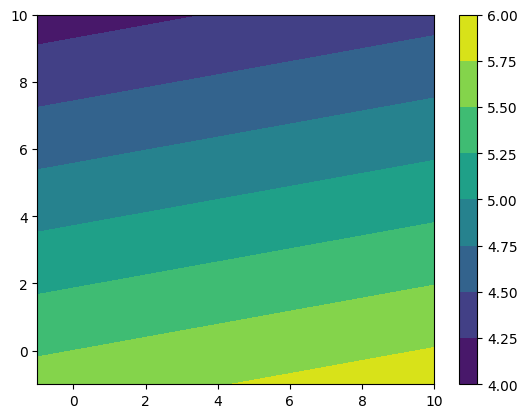

In [39]:
y2_func = np.reshape(y2_func,[200,200])
plt.contourf(x1line,x2line,y2_func)
plt.colorbar()

AttributeError: 'Axes' object has no attribute 'colorbar'

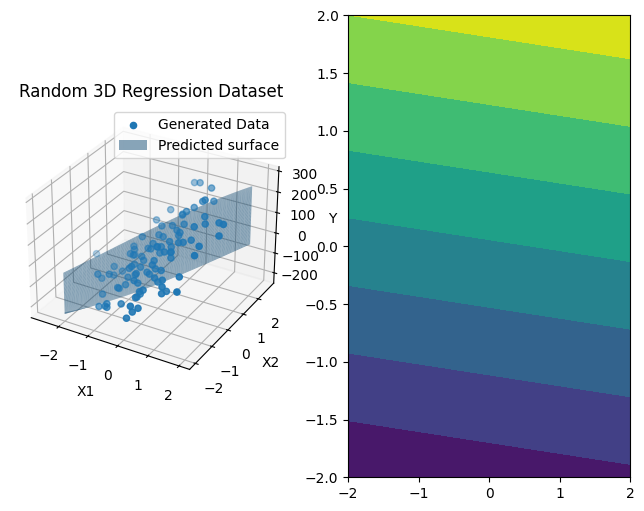

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_regression

def gen_sample_grid(npx=200, npy=200, limit = 4):
  x1line = np.linspace(-limit, limit, npx)
  x2line = np.linspace(-limit, limit, npy)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
  return Xgrid, x1line, x2line
Xgrid, x1line, x2line = gen_sample_grid(200, 200, 2)

# Generate a random 3D dataset with two features (X1, X2) and one target variable (y)
X, y = make_regression(n_samples=100, n_features=2, noise=20, random_state=42)

## doing the regression anlysis
model_y1 = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
model_y1.fit(X, y)
y1_func = model_y1.predict(Xgrid)

# Plot the generated 3D dataset
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, marker='o', label='Generated Data')
ax.plot_surface(x1line, x2line, y1_func.reshape(200,200), alpha=0.5, label='Predicted surface')
ax.set_title('Random 3D Regression Dataset')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.legend()

ax1 = fig.add_subplot(122)
ax1.contourf(x1line,x2line,y2_func.reshape(200,200))
plt.show()